# Post error plots, final figures for paper Neural Computation

In [2]:
# Call the packages
using JLD2                      # loading data
using Plots
using LaTeXStrings              # nice LaTeX strings
using FileIO
# plotlyjs() doesn't work rightn ow, change it for saving figures
using DataFrames,CSV
using Query
using Distributions, StatsBase
gr()



Plots.GRBackend()

In [3]:
## Performance plot 
fig=plot()
Irlist=[0.05]
Tlist=[700,5000]
ilist=[38,50]
pE=Float64[]
pS=Float64[]
vE=Float64[]
vS=Float64[]
for k=1:1
Ir=0.05#0.05
Tr=Tlist[k]
    
    imax=ilist[k]


Cohlist=linspace(0.01,20,20)
for c in Cohlist[1:end]
        pEtemp=Float64[]
        pStemp=Float64[]
    for i=1:imax
        
df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )
#df=CSV.read("/media/kevin/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )

PE = @from i in df begin
    @where i.LastTrial < 0
    @select {i.NotError,i.Distri}
    @collect DataFrame
       end

PS = @from i in df begin
    @where i.LastTrial > 0
    @select {i.NotError,i.Distri}
    @collect DataFrame
       end

PerfE=@from i in PE begin
    @group  i.NotError by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g+1)/2
    @collect Dict
end

PerfS=@from i in PS begin
    @group  i.NotError by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g+1)/2
    @collect Dict
end


  for (key,v) in PerfS
        if key>0

                push!(pStemp,v)
        end
end
          for (key,v) in PerfE
        if key>0

                  push!(pEtemp,v)
        end
end
  end

    push!(pE,mean(pEtemp))
    push!(pS,mean(pStemp))
        push!(vE,var(pEtemp))
    push!(vS,var(pStemp))

end

plot!(Cohlist,pE,ribbon=sqrt.(vE)./2,label="error",linewidth=3)
plot!(Cohlist,pS,ribbon=sqrt.(vS)./2,label="sucess",linewidth=3)

end

fig

LoadError: [91mArgumentError: "/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh0.01-Final200Exp1-Mu30-T700-Ir0.05.csv" is not a valid file[39m


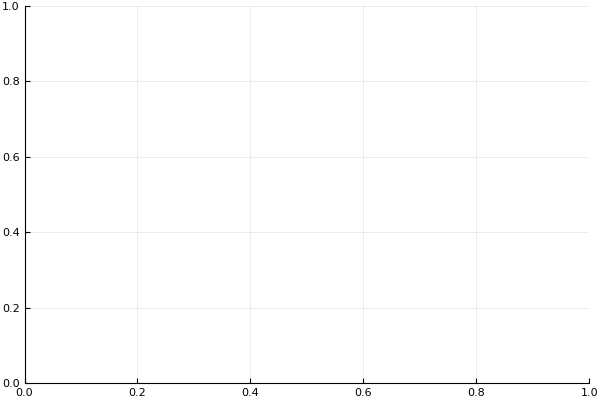

In [8]:
fig

In [27]:
# Histogram Discri Threshold

using LsqFit
using StatPlots
using Distributions
Ilist=[0.035]
Tlist=[500,1000,5000]
ilist=[200,100,70]
fig=plot()
alphalist=Float64[]
alphalist2=Float64[]
for k=2:2
Ir=0.05#0.05
Tr=Tlist[k]
imax=ilist[k]
fig=plot()
pE=Float64[]
pS=Float64[]
vE=Float64[]
vS=Float64[]
Cohlist=linspace(0.01,20,20)
i=1

 for i=1:imax
       pEtemp=Float64[]
       pStemp=Float64[]
for c in Cohlist[1:end]


    df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/data/Article/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )

PE = @from i in df begin
    @where i.LastTrial < 0
    @select {i.NotError,i.Distri}
    @collect DataFrame
       end

PS = @from i in df begin
    @where i.LastTrial > 0
    @select {i.NotError,i.Distri}
    @collect DataFrame
       end

PerfE=@from i in PE begin
    @group  i.NotError by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g+1)/2
    @collect Dict
end

PerfS=@from i in PS begin
    @group  i.NotError by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g+1)/2
    @collect Dict
end

  for (key,v) in PerfS
        if key>0
                push!(pStemp,v)
        end
end
          for (key,v) in PerfE
        if key>0
                push!(pEtemp,v)
        end
end
  end

xdata = linspace(0.01,20,20)
ydata = pEtemp
p0 = [0.5, 0.5]
model(x,p)=1-0.5.*exp.(-(x./p[1]).^p[2])
fit = curve_fit(model, xdata, ydata, p0)
fit2 = curve_fit(model, xdata, pStemp, p0)

    push!(alphalist,fit.param[1])
    push!(alphalist2,fit2.param[1])

end

histogram!(alphalist,bins=20,alpha=0.5,normed=true,color=:blue)
histogram!(alphalist2,bins=20,alpha=0.5,normed=true,color=:orange)

d = Distributions.fit(Normal, alphalist)
dS = Distributions.fit(Normal, alphalist2)

plot!(d, linewidth=3,color=:blue,line=:dot)
plot!(dS, linewidth=3,color=:orange,line=:dot)
savefig(fig,"moreeffects3.eps")

end
fig

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5.75 
 
 
 6.00 
 
 
 6.25 
 
 
 6.50 
 
 
 6.75 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip4302)" style="stroke:#0000ff; stroke-width:3; stroke-opacity:1; fill:none" stroke-dasharray="2, 3" points="
 22.4386,375.672 25.1936,375.644 50.6678,375.147 76.1419,373.794 91.4508,372.164 106.76,369.516 119.703,366.16 132.647,361.457 139.677,358.225 146.707,354.452 
 153.737,350.095 160.767,345.117 167.248,339.955 173.729,334.23 180.211,327.945 186.692,321.112 200.589,304.767 214.486,286.591 230.587,264.425 246.688,242.883 
 253.842,234.084 260.996,226.042 268.151,218.946 275.305,212.969 281.579,208.768 287.852,205.628 294.126,203.611 300.4,202.758 307.24,203.175 314.08,204.986 
 320.92,208.147 327.76,212.583 334.64,218.225 341.521,224.92 348.402,232.514 355.282,240.842 370.497,260.985 385.712,281.978 400.189,301.221 414.665,318.642 
 422.192,326.739 429.718,334.104 437.244,340.712 444.77,346.565 457.441,354.776 470.112,361.104 485.581,366.671 501.051,370.373 515.593,372.608 530.135,374.004 
 553.432,375.163 576.73,375.626 580.315,375.664 
 "/>
<polyline clip-path="url(#clip4302)" style="stroke:#ffa500; stroke-width:3; stroke-opacity:1; fill:none" stroke-dasharray="2, 3" points="
 168.831,375.505 170.322,375.454 184.103,374.534 197.884,372.035 206.166,369.021 214.448,364.127 221.451,357.923 228.453,349.23 232.256,343.255 236.059,336.282 
 239.863,328.228 243.666,319.026 247.172,309.483 250.678,298.902 254.185,287.284 257.691,274.653 265.209,244.44 272.727,210.843 281.438,169.869 290.148,130.051 
 294.019,113.786 297.889,98.9208 301.759,85.8037 305.63,74.7557 309.024,66.9913 312.418,61.1866 315.812,57.4582 319.206,55.8819 322.906,56.6523 326.607,59.9996 
 330.307,65.8428 334.007,74.0421 337.73,84.4717 341.452,96.846 345.175,110.884 348.897,126.278 357.128,163.512 365.359,202.316 373.191,237.885 381.023,270.088 
 385.094,285.055 389.166,298.668 393.238,310.883 397.309,321.701 404.164,336.88 411.019,348.577 419.388,358.868 427.757,365.71 435.624,369.841 443.491,372.421 
 456.095,374.564 468.698,375.419 470.638,375.491 
 "/>
 
 
 
 
 
 y1 
 
 
 
 
 y2 
 
 
 
 y3 
 
 
 
 y4

In [28]:
savefig(fig,"moreeffects3.pdf")
using HypothesisTests
UnequalVarianceTTest(alphalist,alphalist2)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.04018033840459001
    95% confidence interval: (-0.07805526902991121, -0.0023054077792688116)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.03774315933584233

Details:
    number of observations:   [100,100]
    t-statistic:              -2.095910756387337
    degrees of freedom:       152.37702772904015
    empirical standard error: 0.019170825037344498



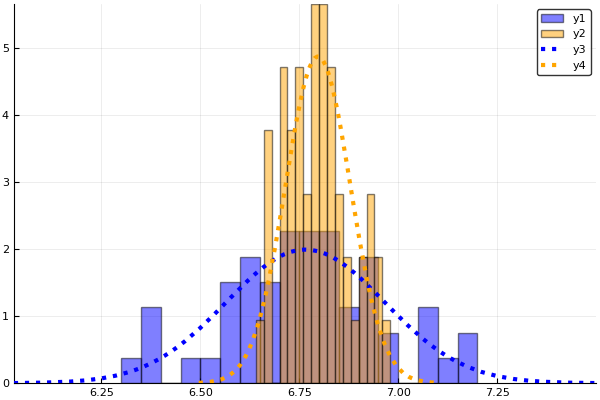

In [16]:

fig=plot()
histogram!(alphalist,bins=20,alpha=0.5,normed=true,color=:blue)
histogram!(alphalist2,bins=20,alpha=0.5,normed=true,color=:orange)
using StatPlots
using Distributions
d = Distributions.fit(Normal, alphalist)
dS = Distributions.fit(Normal, alphalist2)

plot!(d, linewidth=3,color=:blue,line=:dot)
plot!(dS, linewidth=3,color=:orange,line=:dot)
fig

In [26]:

### RTs difference Post error 
gr()
Ir=0.05#0.05
Tr=500
Ilist=[0.05,0.035,0.035]
Tlist=[500,500,5000]
ilist=[30,230,50]
Cohlist=linspace(0.01,20,20)

#for k=1:3
k=3
    RTE=Float64[]
RTS=Float64[]
vE=Float64[]
vS=Float64[]
    Ir=Ilist[k]
    Tr=Tlist[k]
    imax=ilist[k]
for c in Cohlist[1:end]
    RTEtemp2=Float64[]
        RTEtemp=Float64[]
        RTStemp=Float64[]
    for i=1:imax
        df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/data/Article/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )
#df=CSV.read("/media/kevin/Boulot/Projects/SequentialDecisionMaking/data/Article/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )

PE = @from i in df begin
    @where i.LastTrial < 0
            @select {i.RTs,i.Distri,i.LastTrial}
    @collect DataFrame
       end

PS = @from i in df begin
    @where i.LastTrial > 0
            @select {i.RTs,i.Distri,i.LastTrial}
    @collect DataFrame
       end
PEE = DataFrame()
        templist=Float64[]
        tempcoh=Float64[]
        for x=1:length(df[:RTs])-1
          if   df[:LastTrial][x]==-1
                push!(templist,df[:RTs][x+1])
                push!(tempcoh,df[:Distri][x+1])
            end
            
        end
          #  PEE[:RTs] = df[:RTs][(df[:LastTrial][1:end].==-1)]
        #PEE[:Distri]= df[:Distri][(df[:LastTrial][1:end].==-1)]
        PEE[:RTs]=templist
        PEE[:Distri]=tempcoh
    PSS=DataFrame()
         templist=Float64[]
        tempcoh=Float64[]
        for x=1:length(df[:RTs])-1
          if   df[:LastTrial][x]==1
                push!(templist,df[:RTs][x+1])
                push!(tempcoh,df[:Distri][x+1])
            end
            
        end
         PSS[:RTs]=templist
        PSS[:Distri]=tempcoh
          #  PEE
        
        #PSS = df[:RTs][(df[:LastTrial].==1)]

PerfE=@from i in PEE begin #PE begin
            @group  i.RTs by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g)
    @collect Dict
end

        
PerfS=@from i in PSS begin
            @group  i.RTs by @NT(coh = i.Distri) into g
    @select g.key.coh=>m = mean(g)
    @collect Dict
end
  for (key,v) in PerfS
        if key>0
                push!(RTStemp,v)
             
        end
end
          for (key,v) in PerfE
       if key>0
                push!(RTEtemp,v)
                       end
end
        push!(RTEtemp2,RTEtemp[end]-RTStemp[end])
  end
    push!(RTE,mean(RTEtemp2))
    push!(RTS,mean(RTStemp))
        push!(vE,var(RTEtemp2))
    push!(vS,var(RTStemp))

end

fig =plot(Cohlist,RTE,ribbon=sqrt.(vE)./2,label="error-suc",linewidth=3)
savefig(fig,"moreeffects3.png")
#savefig(fig,"/media/kevin/Boulot/Preprints/Sequence_Neural_Computation/Fig_temp/PostErrorRT$Tr-$Ir.svg")
#end

In [ ]:

#%% Delta S Posterror 18/01/18
i=1
Ir=0.05
Tr=5000
c=Cohlist[7]
x=Float64[]
x2=Float64[]
e=Float64[]
meanES1=Float64[]
meanES2=Float64[]
meanSS1=Float64[]
meanSS2=Float64[]
e2=Float64[]

for i=1:80
df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )
dES1=Float64[]
dES2=Float64[]
dSS1=Float64[]
dSS2=Float64[]
dfE = @from i in df begin
    @where i.LastTrial < 0 && i.NotError==1 && i.Distri>0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfS =@from i in df begin
    @where i.LastTrial > 0 && i.NotError==1 && i.Distri>0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfE2 = @from i in df begin
    @where i.LastTrial < 0 && i.NotError==1 && i.Distri<0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfS2 =@from i in df begin
    @where i.LastTrial > 0 && i.NotError==1 && i.Distri<0
    @select {i.S1,i.S2}
    @collect DataFrame
       end

x=vcat(dfE[:S1],dfE2[:S2],x)
dES1=vcat(dfE[:S1],dES1)
dES2=vcat(dfE[:S2],dES2)
dES1=vcat(dfE2[:S1],dES1)
dES2=vcat(dfE2[:S2],dES2)


push!(meanES1,mean(dfE[:S1]))
push!(meanES1,mean(dfE2[:S2]))
push!(meanES2,mean(dfE[:S2]))
push!(meanES2,mean(dfE2[:S1]))
#dES1=vcat(dfE2[:S2],dES1)
#dES2=vcat(dfE2[:S1],dES2)
push!(meanSS1,mean(dfS[:S1]))
push!(meanSS1,mean(dfS2[:S2]))
push!(meanSS2,mean(dfS[:S2]))
push!(meanSS2,mean(dfS2[:S1]))


dSS1=vcat(dfS[:S1],dSS1)
dSS2=vcat(dfS[:S2],dSS2)

dSS1=vcat(dfS2[:S1],dSS1)
dSS2=vcat(dfS2[:S2],dSS2)
#dSS1=vcat(dfS2[:S2],dSS1)
#dSS2=vcat(dfS2[:S1],dSS2)

#eprime=vcat(dfE[:S1],dfE2[:S2],e)
#eprime2=vcat(dfS[:S2],dfS2[:S1],e2)
x2=vcat(dfS[:S1],dfS2[:S2],x2)
e=vcat(dfE[:S2],dfE2[:S1],e)
e2=vcat(dfS[:S2],dfS2[:S1],e2)

end
#histogram(abs.(x),normalized=true,alpha=.3)
#histogram!(abs.(x2),normalized=true,alpha=.3)

#histogram(abs.(e),normalized=true,alpha=.5)
#histogram!(abs.(e2),normalized=true,alpha=.5)

using HypothesisTests

#ApproximateTwoSampleKSTest(e,e2)

#scatter(meanES1,meanES2,markeralpha=0.5)
#scatter!(meanSS1,meanSS2,markeralpha=0.5)

histogram(meanES2,normed=true,bins=40,alpha=0.6)
histogram!(meanSS2,normed=true,bins=40,alpha=0.6)
#savefig("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/fig/Posterror/DeltaST5000Hist.svg")
ApproximateTwoSampleKSTest(meanES2,meanSS2)

histogram(meanES1,normed=true,bins=40,alpha=0.6)
histogram!(meanSS1,normed=true,bins=40,alpha=0.6)
#savefig("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/fig/Posterror/DeltaST5000HistWinning.svg")

ApproximateTwoSampleKSTest(meanES1,meanSS1)


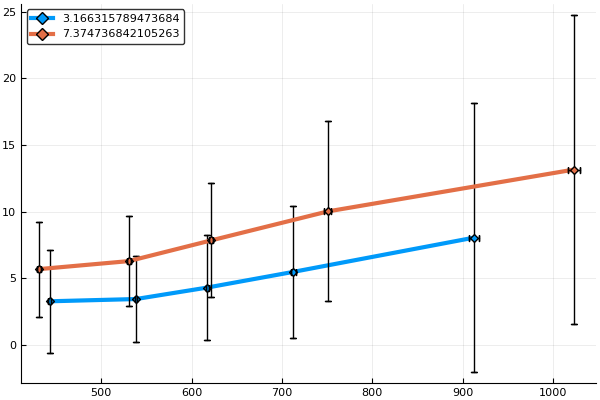

In [36]:


#%% Quantile Plots RTs Post error 18/01/18                
fig=plot()
Tr=500
Ir=0.035
c=Cohlist[7]
for c in Cohlist[4:4:8]
D=Float64[]
A=Float64[]
vD=Float64[]
vA=Float64[]
q=Dict("q1"=>Float64[],
"q2"=>Float64[],
"q3"=>Float64[],
"q4"=>Float64[],
"q5"=>Float64[])
qs=Dict("q1"=>Float64[],
"q2"=>Float64[],
"q3"=>Float64[],
"q4"=>Float64[],
"q5"=>Float64[])
ltemp2=Float64[]
vtemp2=Float64[]
for j=1:250
rEF=Float64[]
rSF=Float64[]
             #   df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$j-Mu30-T$Tr-Ir$Ir.csv" )
df=CSV.read("/media/kevin/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$j-Mu30-T$Tr-Ir$Ir.csv" )
    dfS = @from i in df begin
                @where i.LastTrial > 0 && i.RTs>0
    @select {i.RTs,i.Distri}
    @collect DataFrame
       end

dfE = @from i in df begin
    @where i.LastTrial < 0 && i.RTs>0
    @select {i.RTs,i.Distri}
    @collect DataFrame
       end

            qE=quantile(dfE[:RTs],[0.1 0.3 0.5 0.7 0.9])[1:end]
            qS=quantile(dfS[:RTs],[0.1 0.3 0.5 0.7 0.9])[1:end]
                                for i=1:5
                push!(q["q$i"],qE[i])
                push!(qs["q$i"],qS[i])


                                end
     end
         for i=1:5
        push!(D,mean(q["q$i"])-mean(qs["q$i"]))
            push!(vD,var(q["q$i"]-qs["q$i"]))
    push!(A,(mean(q["q$i"])+mean(qs["q$i"])./2))
            push!(vA,var(q["q$i"]+qs["q$i"])./4)

                                end


plot!(A,D,yerr=sqrt.(vD./6.*5),xerr=sqrt.(vA./6.*5)  ,label="$c",linewidth=3,marker=:diamond )

end
fig

In [ ]:
# Dynamical analysis
i=1
Tlist=[500,5000]
ilist=[400,100]
k=2
Cohlist=linspace(0.01,20,20)
Ir=0.05
Tr=Tlist[k]
imax=ilist[k]
c=Cohlist[7]
x=Float64[]
x2=Float64[]
e=Float64[]
meanES1=Float64[]
meanES2=Float64[]
meanSS1=Float64[]
meanSS2=Float64[]
e2=Float64[]

for i=1:imax
df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )
#df=CSV.read("/media/kevin/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$i-Mu30-T$Tr-Ir$Ir.csv" )

dES1=Float64[]
dES2=Float64[]
dSS1=Float64[]
dSS2=Float64[]
dfE = @from i in df begin
    @where i.LastTrial < 0 && i.NotError==1 && i.Distri>0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfS =@from i in df begin
    @where i.LastTrial > 0 && i.NotError==1 && i.Distri>0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfE2 = @from i in df begin
    @where i.LastTrial < 0 && i.NotError==1 && i.Distri<0
    @select {i.S1,i.S2}
    @collect DataFrame
       end


dfS2 =@from i in df begin
    @where i.LastTrial > 0 && i.NotError==1 && i.Distri<0
    @select {i.S1,i.S2}
    @collect DataFrame
       end

x=vcat(dfE[:S1],dfE2[:S2],x)
dES1=vcat(dfE[:S1],dES1)
dES2=vcat(dfE[:S2],dES2)
dES1=vcat(dfE2[:S1],dES1)
dES2=vcat(dfE2[:S2],dES2)


push!(meanES1,mean(dfE[:S1]))
push!(meanES1,mean(dfE2[:S2]))
push!(meanES2,mean(dfE[:S2]))
push!(meanES2,mean(dfE2[:S1]))
#dES1=vcat(dfE2[:S2],dES1)
#dES2=vcat(dfE2[:S1],dES2)
push!(meanSS1,mean(dfS[:S1]))
push!(meanSS1,mean(dfS2[:S2]))
push!(meanSS2,mean(dfS[:S2]))
push!(meanSS2,mean(dfS2[:S1]))


dSS1=vcat(dfS[:S1],dSS1)
dSS2=vcat(dfS[:S2],dSS2)

dSS1=vcat(dfS2[:S1],dSS1)
dSS2=vcat(dfS2[:S2],dSS2)
#dSS1=vcat(dfS2[:S2],dSS1)
#dSS2=vcat(dfS2[:S1],dSS2)

#eprime=vcat(dfE[:S1],dfE2[:S2],e)
#eprime2=vcat(dfS[:S2],dfS2[:S1],e2)
x2=vcat(dfS[:S1],dfS2[:S2],x2)
e=vcat(dfE[:S2],dfE2[:S1],e)
e2=vcat(dfS[:S2],dfS2[:S1],e2)

end
#histogram(abs.(x),normalized=true,alpha=.3)
#histogram!(abs.(x2),normalized=true,alpha=.3)

#histogram(abs.(e),normalized=true,alpha=.5)
#histogram!(abs.(e2),normalized=true,alpha=.5)

using HypothesisTests

#ApproximateTwoSampleKSTest(e,e2)

#scatter(meanES1,meanES2,markeralpha=0.5)
#scatter!(meanSS1,meanSS2,markeralpha=0.5)



In [14]:
ApproximateTwoSampleKSTest(meanES2,meanSS2)

Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.2000000000000001

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0006709252557796906

Details:
    number of observations:   [200,200]
    KS-statistic:              2.000000000000001


In [16]:
UnequalVarianceTTest(meanES2,meanSS2)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.004505936832135404
    95% confidence interval: (-0.011200205090570032, 0.02021207875484084)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5727438685718553

Details:
    number of observations:   [200,200]
    t-statistic:              0.5646587319990608
    degrees of freedom:       289.0285850690354
    empirical standard error: 0.007979929427785594



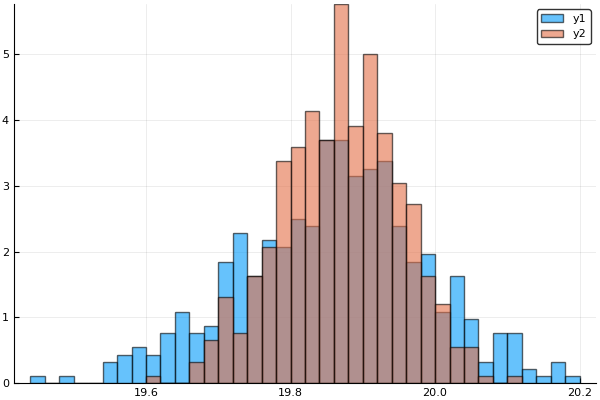

In [57]:

histogram(meanES1,normed=true,bins=40,alpha=0.6)
histogram!(meanSS1,normed=true,bins=40,alpha=0.6)




In [60]:
ApproximateTwoSampleKSTest(meanES1,meanSS1)
#UnequalVarianceTTest(meanES2,meanSS2)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.0312620434480384
    95% confidence interval: (0.02211718491432499, 0.040406901981751814)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           3.684878216221721e-11

Details:
    number of observations:   [460,460]
    t-statistic:              6.7104165767608155
    degrees of freedom:       795.8021080422812
    empirical standard error: 0.00465873364051698


In [14]:
Cohlist=linspace(0.01,20,20)
Ilist=[0.035,0.035]
Tlist=[500,5000]
ilist=[360,62]
for k=1:2
fig=plot()
Tr=Tlist[k]
Ir=Ilist[k]
imax=ilist[k]
for c in Cohlist[4:4:8]
D=Float64[]
A=Float64[]
vD=Float64[]
vA=Float64[]
q=Dict("q1"=>Float64[],
"q2"=>Float64[],
"q3"=>Float64[],
"q4"=>Float64[],
"q5"=>Float64[])
qs=Dict("q1"=>Float64[],
"q2"=>Float64[],
"q3"=>Float64[],
"q4"=>Float64[],
"q5"=>Float64[])
ltemp2=Float64[]
vtemp2=Float64[]
for j=1:imax
rEF=Float64[]
rSF=Float64[]
                df=CSV.read("/home/kevin/Documents/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$j-Mu30-T$Tr-Ir$Ir.csv" )
#df=CSV.read("/media/kevin/Boulot/Projects/SequentialDecisionMaking/src/datatemp/FinalLaming/Coh$c-Final200Exp$j-Mu30-T$Tr-Ir$Ir.csv" )
    dfS = @from i in df begin
                @where i.LastTrial > 0 && i.RTs>0
    @select {i.RTs,i.Distri}
    @collect DataFrame
       end

dfE = @from i in df begin
    @where i.LastTrial < 0 && i.RTs>0
    @select {i.RTs,i.Distri}
    @collect DataFrame
       end

            qE=quantile(dfE[:RTs],[0.1 0.3 0.5 0.7 0.9])[1:end]
            qS=quantile(dfS[:RTs],[0.1 0.3 0.5 0.7 0.9])[1:end]
                                for i=1:5
                push!(q["q$i"],qE[i])
                push!(qs["q$i"],qS[i])


                                end
     end
         for i=1:5
        push!(D,mean(q["q$i"])-mean(qs["q$i"]))
            push!(vD,var(q["q$i"]-qs["q$i"]))
    push!(A,(mean(q["q$i"])+mean(qs["q$i"])./2))
            push!(vA,var(q["q$i"]+qs["q$i"])./4)

                                end

println(vD)
plot!(A,D,yerr=sqrt.(vD),xerr=sqrt.(vA),label="$c",linewidth=3 )

end
savefig(fig,"/home/kevin/Documents/Boulot/Preprints/Sequence_Neural_Computation/Fig_temp/PostErrorQuantilesRT$Tr-$Ir.svg")
end


[16.3888, 12.8749, 17.1829, 28.8676, 122.29]
[15.3497, 14.2026, 22.2685, 55.4397, 168.23]


LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <type 'exceptions.TypeError'>
TypeError("'Path' object does not support indexing",)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py", line 1717, in inner
    return func(ax, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py", line 4012, in scatter
    if isinstance(marker, mmarkers.MarkerStyle):
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/markers.py", line 189, in __init__
    self.set_marker(marker)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/markers.py", line 256, in set_marker
    marker[1] in (0, 1, 2, 3)):
[39m